In [ ]:
"""
TEMPLATE GRAPH
Template code to graph variables live.
"""
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

#Turn interactivity on
plt.ion()

while True:
    data = pd.read_csv("output.csv")
    lm = data['left motor'].values
    rm = data['right motor'].values
    clear_output(wait=True)
    xplot = np.arange(0, data.shape[0]/20, 0.05)
    plt.plot(xplot, lm, label='left-motor')
    plt.plot(xplot, rm, label='right-motor')
    plt.pause(1)

while True:
    clear_output()
    plt.pause(1)

In [ ]:
"""
BASIC LIVE TRACKING
This cell when executed graphs data from the 6 sensors - Light, Ultrasound and Motor for both Left and Right sides.
"""
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
from DataManipulation import DataManipulation

plt.ion()

while True:
    
    #Setting up the subplots
    grid = plt.figure(figsize=(20,10))
    ls = grid.add_subplot(321)
    plt.title("Left Light Sensor")
    rs = grid.add_subplot(322)
    plt.title("Right Light Sensor")
    luv = grid.add_subplot(323)
    plt.title("Left Ultrasound Sensor")
    ruv = grid.add_subplot(324)
    plt.title("Right Ultrasound Sensor")
    lm = grid.add_subplot(325)
    plt.title("Left Motor")
    rm = grid.add_subplot(326)
    plt.title("Right Motor")

    #Reading obtained data
    data = DataManipulation()
    
    #Assigning different variables values to be plotted
    lm_values = data.get_data()['left motor'].values
    rm_values = data.get_data()['right motor'].values
    ls_values = data.get_data()['left sensor'].values
    rs_values = data.get_data()['right sensor'].values
    luv_values = data.get_data()['left ultrasound sensor'].values
    ruv_values = data.get_data()['right ultrasound sensor'].values
    
    time = np.arange(0, data.get_data().shape[0]/20, 0.05)
    
    #Plotting the data for left light sensor
    ls.plot(time, ls_values, label='left-light')
    ls.set_xlabel("Time")
    ls.set_ylabel("Normalized Light Value")
    ls.set_ylim(0, 1)
    
    #Plotting the data for right light sensor
    rs.plot(time, rs_values, label='right-light')
    rs.set_xlabel("Time")
    rs.set_ylabel("Normalized Light Value")
    rs.set_ylim(0, 1)
    
    #Plotting the data for left ultrasound sensor
    luv.plot(time, luv_values, label='left-uv')
    luv.set_xlabel("Time")
    luv.set_ylabel("Normalized Ultrasound Value")
    luv.set_ylim(0, 0.8)
    
    #Plotting the data for right ultrasound sensor
    ruv.plot(time, ruv_values, label='right-uv')
    ruv.set_xlabel("Time")
    ruv.set_ylabel("Normalized Ultrasound Value")
    ruv.set_ylim(0, 0.8)
    
    #Plotting the data for left motor speed
    lm.plot(time, lm_values, label='left-motor')
    lm.set_xlabel("Time")
    lm.set_ylabel("Left Motor Speed")
    lm.set_ylim(-1000, 1000)
    
    #Plotting the data for right motor speed
    rm.plot(time, rm_values, label='right-motor')
    rm.set_xlabel("Time")
    rm.set_ylabel("Right Motor Speed")
    rm.set_ylim(-1000, 1000)
    
    plt.tight_layout()
    
    #Clearing the graph only when new data is available
    clear_output(wait=True)
    plt.pause(1)

while True:
    clear_output(wait=True)
    plt.pause(1)

In [ ]:
"""
LIGHT-MOTOR MAP
#This graph represents the relationship between the combined amount of light detected
#and the combined speed of the motors with vectors. This was to show the transitions between
#different sensorimotor states in a 2D light-motor space.
"""
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
import timeit
from DataManipulation import DataManipulation

#A timer to measure how long each iteration executes.
start_time = timeit.default_timer()

plt.ion()

while True:
    #Read light and motor values, and add the left and right sides together for 
    #combined light and combined motor values
    data = DataManipulation()  
    plt.figure(figsize=(20,20))
    x = data.get_data()['left sensor'].values + data.get_data()['right sensor'].values
    y = data.get_data()['left motor'].values + data.get_data()['right motor'].values
    
    #Plot the data as a transparent line graph
    clear_output(wait=True)
    plt.subplot(211)
    plt.plot(x, y, label="Sensory-Motor path", alpha=0.1)
    
    #Plot the last 3 seconds of data in a red line
    recentX = x[-60:]
    recentY = y[-60:]
    plt.plot(recentX, recentY, color="red")
    
    #Add titles and labels
    plt.title("Motor Speed vs Relative Light w/ Vectors")
    plt.xlabel('Light')
    plt.ylabel('Motor Speed')
    
    #Add vectors to indicate direction of state transitions.
    plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, alpha=0.1)
    plt.quiver(x[-60:-1], y[-60:-1], x[-59:]-x[-60:-1], y[-59:]-y[-60:-1], scale_units='xy', angles='xy', scale=1, color='red')

    #Plotting an additional scatterplot for recording frequency of the visits to specific states
    plt.subplot(212)
    plt.hist2d(x, y, norm=mpl.colors.LogNorm(), bins=11, cmap=plt.cm.YlGnBu)
    plt.title("Motor Speed vs Relative Light w/ Colour Plot")
    plt.xlabel('Light')
    plt.ylabel('Motor Speed')   
    plt.colorbar(orientation='horizontal', label='Frequency of visits')
  
    #Give spacing between subplots
    plt.tight_layout()
    
    #Pause for 1 second to give time for graph to update
    plt.pause(1)
    
    #Elapsed time printout for determining execution time of each iteration
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
    start_time = timeit.default_timer()
    
while True:
    clear_output()
    plt.pause(1)


In [ ]:
"""
HEATMAP EXAMPLE
A dummy graph for playing around with normalisation
"""
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
import timeit
from DataManipulation import DataManipulation

while True:
    plt.figure(figsize=(20,10))
    
    #Reading the data from csv file, and normalizing the motor values between -1 and 1.
    data = DataManipulation()    
    data.normalized_motor()

    #Clear previous output when new data is available
    clear_output(wait=True)
    
    #Plot heatmap
    im = plt.imshow(data.get_data(),cmap='hot',aspect='auto', interpolation='none')
    plt.colorbar(im,orientation='horizontal')
    plt.pause(1)

while True:
    clear_output(wait=True)
    plt.pause(1)


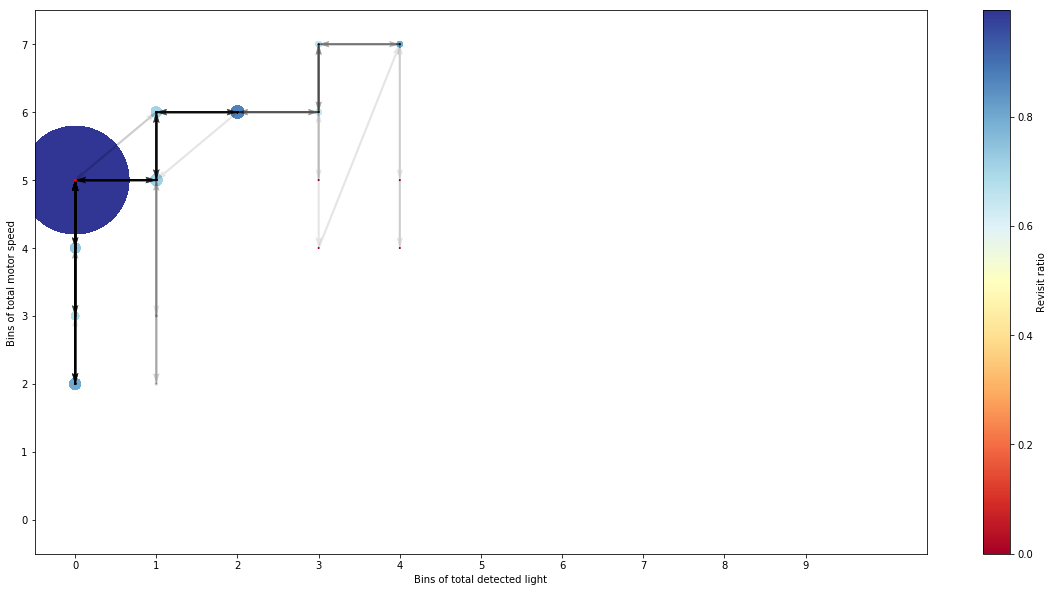

5.154605440999148


In [ ]:
"""
QUIVER & BUBBLE PLOT FOR LIGHT/MOTOR STATES
The quiver plot plots the direction of state transitions whereas the bubble plot plots the frequency of visits to 
a specific state.
"""
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
from IPython.display import clear_output
import time
import timeit
from DataManipulation import DataManipulation

#A timer to measure how long each iteration executes.
start_time = timeit.default_timer()

while True:

    #Reading the data and normalizing values for light
    data = DataManipulation()
    data.normalized_motor()
    data.normalized_0_to_1()
    total_motor = data.get_total_motor()
    total_sensor = data.get_total_sensor()
    
    total = data.convert_values_to_bins(total_sensor, total_motor)
    
    #A dictionary within a dictionary to store transitions between different bins
    transitions = {}
    
    #A dicitionary to store frequency of bins that have been visited
    frequency = {}
    
    for i in range(0,100):
        frequency[i] = 0
        transitions[i] = {}
    
    for i in range(len(total)-1):
        if total[i] not in transitions:
            transitions[total[i]] = {}

        if total[i+1] not in transitions[total[i]]:
            transitions[total[i]][total[i+1]] = 1
        else:
            transitions[total[i]][total[i+1]] += 1

    xArray, yArray = data.digitize_total_values(total,type='2d')
    
    #Incrementing the frequency of a specific bin entry for every occurrence of that bin value.
    for i in total:
        index = int(i)
        frequency[index] += 1

    #Populating area and color arrays to represent frequency and revisit ratio respectively
    areaArray = []
    colourArray = []
    
    for t in total:
        #Area array populated by frequency of visits to a specific state.
        areaArray.append(frequency[t])
        
        #If state 't' has revisited itself, then calculate ratio by dividing 
        #number of t->t transitions by the number of times state t has been visited.
        if t in transitions[t]:
            revisitRatio = (transitions[t][t])/frequency[t]
        else:
            revisitRatio = 0

        colourArray.append(revisitRatio)

    #Clear output when new data is available for graphing
    clear_output(wait=True)
    plt.figure(figsize=(20,10))
    
    #Plotting bubble plot of revisit ratio at different states
    bubbleplt = plt.scatter(x=xArray,y=yArray, c=colourArray, s=areaArray, cmap=plt.cm.RdYlBu)
    plt.colorbar(bubbleplt, label="Revisit ratio")
    
    #Plotting vectors to represent state transitions (in black) and 
    #recent state transitions in the last 2 seconds (in red)
    plt.quiver(xArray[:-1], yArray[:-1], xArray[1:]-xArray[:-1],yArray[1:]-yArray[:-1], angles='xy', scale=1, scale_units='xy', alpha=0.1)
    plt.quiver(xArray[-40:-1], yArray[-40:-1], xArray[-39:]-xArray[-40:-1], yArray[-39:]-yArray[-40:-1], scale_units='xy', angles='xy', scale=1, color='red',units='xy', width=0.03)
    
    #Setting axes limits, ticks and labels.
    plt.xlim(-0.5,10.5)
    plt.ylim(-0.5,max(yArray)+0.5)
    plt.xlabel('Bins of total detected light')
    plt.ylabel('Bins of total motor speed')
    plt.xticks(np.arange(0, 10, 1))
    plt.yticks(np.arange(0, max(yArray)+1, 1))

    #Pause for 1 seconds to give time for graph to render
    plt.pause(1)
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
    start_time = timeit.default_timer()

while True:
    clear_output(wait=True)
    plt.pause(1)

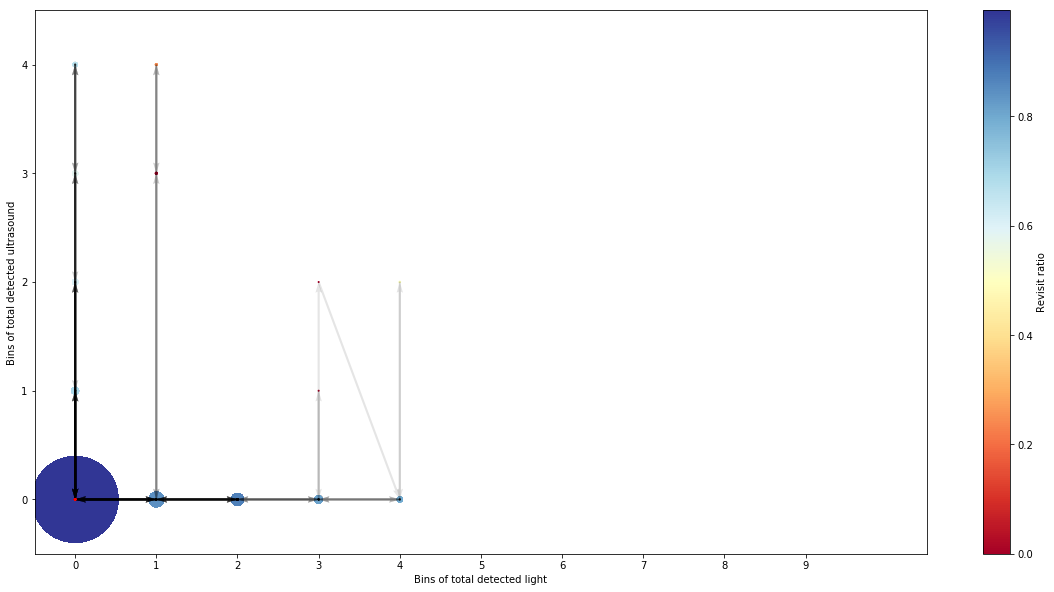

In [5]:
"""
QUIVER & BUBBLE PLOT FOR ULTRASOUND/MOTOR STATES
The quiver plot plots the direction of state transitions whereas the bubble plot plots the frequency of visits to 
a specific state.
"""
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import collections 
from IPython.display import clear_output
import time
import timeit
from DataManipulation import DataManipulation

#Reading the data and normalizing values for light and ultrasound
data = DataManipulation()
data.normalized_0_to_1()
total_sensor = data.get_total_sensor()
total_us = data.get_total_us()

total = data.convert_values_to_bins(total_sensor, total_us)

#A dictionary within a dictionary to store transitions between different bins
transitions = {}

#A dictionary to store frequency of bins that have been visited
frequency = {}
    
for i in range(0,100):
    frequency[i] = 0
    transitions[i] = {}

for i in range(len(total)-1):
    if total[i] not in transitions:
        transitions[total[i]] = {}

    if total[i+1] not in transitions[total[i]]:
        transitions[total[i]][total[i+1]] = 1
    else:
        transitions[total[i]][total[i+1]] += 1

xArray, yArray = data.digitize_total_values(total,type='2d')

#Incrementing the frequency of a specific bin entry for every occurrence of that bin value.
for i in total:
    index = int(i)
    frequency[index] += 1

#Populating area and color arrays to represent frequency and revisit ratio respectively
areaArray = []
colourArray = []

for t in total:
     #Area array populated by frequency of visits to a specific state.
    areaArray.append(frequency[t])
    
    #If state 't' has revisited itself, then calculate ratio by dividing 
    #number of t->t transitions by the number of times state t has been visited.
    if t in transitions[t]:
        revisitRatio = (transitions[t][t])/frequency[t]
    else:
        revisitRatio = 0
    colourArray.append(revisitRatio)

plt.figure(figsize=(20,10))

#Plotting bubble plot for frequency of states visited
bubbleplt = plt.scatter(x=xArray,y=yArray, c=colourArray, s=areaArray, cmap=plt.cm.RdYlBu)
plt.colorbar(bubbleplt, label="Revisit ratio")

#Plotting vectors representing state transitions (black) and recent state transitions (red)
plt.quiver(xArray[:-1], yArray[:-1], xArray[1:]-xArray[:-1],yArray[1:]-yArray[:-1], angles='xy', scale=1, scale_units='xy', alpha=0.1)
plt.quiver(xArray[-40:-1], yArray[-40:-1], xArray[-39:]-xArray[-40:-1], yArray[-39:]-yArray[-40:-1], scale_units='xy', 
           angles='xy', scale=1, color='red',units='xy', width=0.03)

#Setting axes limits, labels and ticks
plt.xlim(-0.5,10.5)
plt.ylim(-0.5,max(yArray)+0.5)
plt.xlabel('Bins of total detected light')
plt.ylabel('Bins of total detected ultrasound')
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, max(yArray)+1, 1))

plt.show()

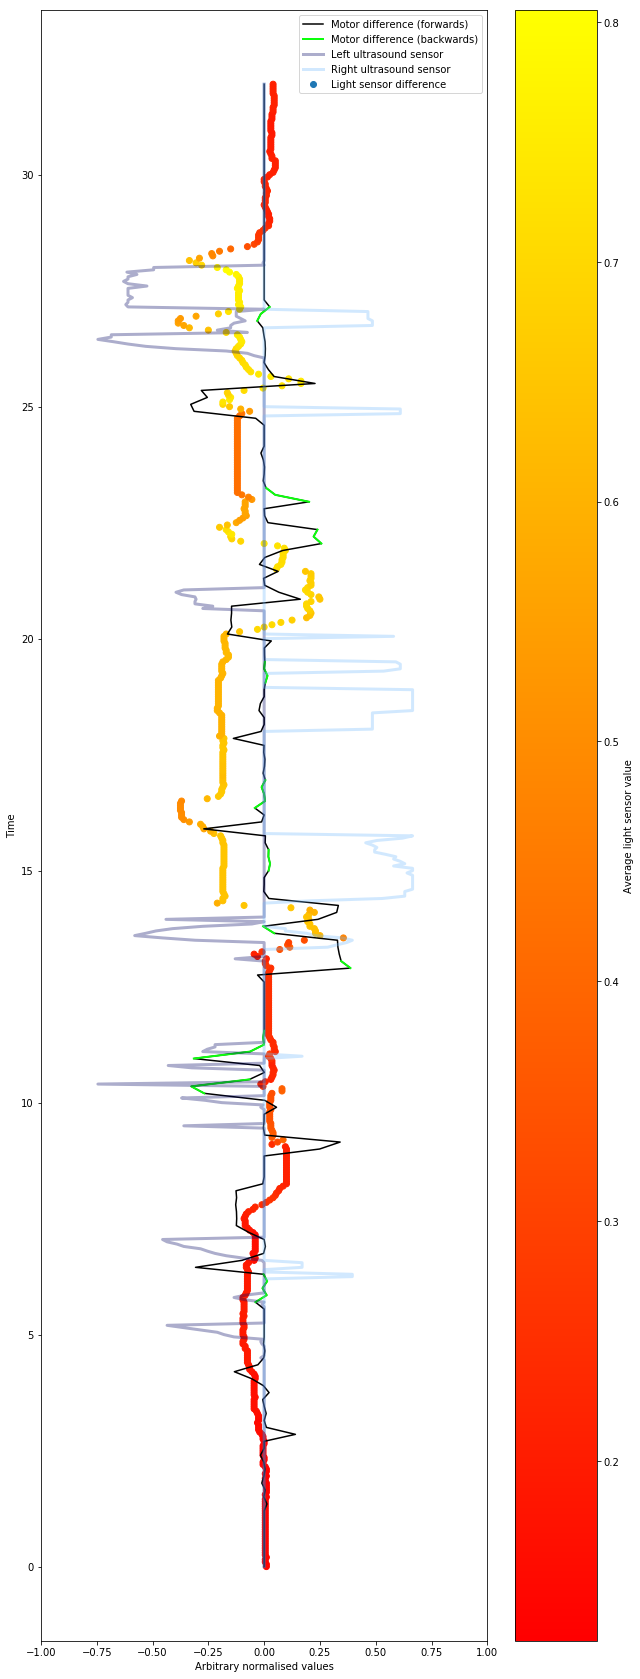

1.568162190989824


In [ ]:
"""
NORMALISED LINE GRAPH & SCATTERPLOT
A complex graph representing normalised sensorimotor values from the light sensors, ultrasound sensors
and motors
"""
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
from IPython.display import clear_output
import time
import timeit
from DataManipulation import DataManipulation

start_time = timeit.default_timer()

while True:
    
    #Read the data and normalize motor values
    data = DataManipulation()
    data.normalized_motor()
    
    sensorimotor_data = data.get_data()
    
    #Calculate motor and light sensor differences between left and right sides
    motor_diff = (sensorimotor_data['left motor'].values - sensorimotor_data['right motor'].values)/2
    sensor_diff = (sensorimotor_data['right sensor'].values - sensorimotor_data['left sensor'].values)/2
    
    #Calculate light and ultrasound value averages of left and right sensors
    avg_sensor = (sensorimotor_data['left sensor'].values + sensorimotor_data['right sensor'].values) / 2
    avg_ultrasound = (sensorimotor_data['left ultrasound sensor'].values + sensorimotor_data['right ultrasound sensor'].values) / 2

    #Calculate time values for each set of data
    time = np.arange(0, sensorimotor_data.shape[0]/20, 0.05)
    
    left_motor = sensorimotor_data['left motor'].values
    right_motor = sensorimotor_data['right motor'].values
    total_sensor = sensorimotor_data['left sensor'].values + sensorimotor_data['right sensor'].values
    left_sensor = sensorimotor_data['left sensor'].values
    right_sensor = sensorimotor_data['right sensor'].values
    left_us = sensorimotor_data['left ultrasound sensor'].values
    right_us = sensorimotor_data['right ultrasound sensor'].values
    
    plt.figure(figsize=(10,30))

    clear_output(wait=True)
    
    #Plot a scatter plot of light sensor difference between left and right sides. Colours would represent the average
    #light detected from left and right sides.
    scatterplt = plt.scatter(sensor_diff, time, c=avg_sensor, cmap=plt.cm.autumn, label='Light sensor difference')
    plt.colorbar(scatterplt, label='Average light sensor value')
    
    #Plot a smoothed-out line plot of the motor differences when the robot is going forwards
    md1 = plt.plot(motor_diff[0::3], time[0::3], color='black', label='Motor difference (forwards)')

    #Create a clone of the motor differences
    md1copy = list(motor_diff)

    #In the cloned motor differences array, replace all the instances when the robot was going forwards with NaN
    frontBackArray = []
    for i in range(0,len(time)):
        if ((left_motor[i] >= 0) and (right_motor[i] >= 0)):
            md1copy[i] = np.NaN

    #Mask values that are NaN, leaving only values when the robot was going backwards
    md1_masked = np.ma.masked_invalid(md1copy)
    
    #Plot a smoothed-out line plot of the motor differences when the robot is going backwards.
    md1b = plt.plot(md1_masked[0::3], time[0::3], color='xkcd:neon green', linewidth=2, label='Motor difference (backwards)')
    
    #Plot a line plot of the normlised left ultrasound values on the left side of the graph
    lul = plt.plot(-left_us,time, color='xkcd:darkblue', linewidth=3, alpha=0.33, label='Left ultrasound sensor')
    
    #Plot a line plot of the noramlised right ultrasound values on the right side of the graph
    rul = plt.plot(right_us, time, color='xkcd:sky blue', linewidth=3, alpha=0.33, label='Right ultrasound sensor')

    plt.xlim(-1,1)
    plt.xlabel("Arbitrary normalised values")
    plt.ylabel("Time")
    plt.legend()
    
    plt.pause(1)
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
    start_time = timeit.default_timer()

while True:
    clear_output(wait=True)
    plt.pause(1)